In [1]:
import numpy as np
import pandas as pd

In [2]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings','kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
'Year': [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

In [4]:
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [10]:
# 분할 - 적용 - 결합
df.groupby("Team")["Points"].sum()

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

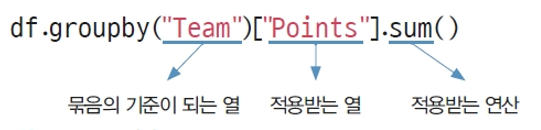

멀티 인덱스 그룹별 집계
  - 한개 이상의 열을 기준으로 그룹별 집계를 실행

In [11]:
multi_groupby = df.groupby( ["Team","Year" ])["Points"].sum()
multi_groupby

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [12]:
multi_groupby.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [16]:
multi_groupby[ ["Devils","Kings"] ]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Name: Points, dtype: int64

멀티인덱스는 사용하기 좀 불편하므로 일반적인 데이터프레임 형태로 사용할수있게 unstack()함수를 사용한다.

In [20]:
multi_groupby.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,NaN,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN
kings,NaN,812.0,NaN,NaN


In [22]:
multi_groupby.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

In [24]:
multi_groupby.swaplevel().sort_index()  # 첫번째 데이터를 기준으로 재 정렬

Year  Team  
2014  Devils    863
      Kings     741
      Riders    876
      Royals    701
2015  Devils    673
      Riders    789
      Royals    804
      kings     812
2016  Kings     756
      Riders    694
2017  Kings     788
      Riders    690
Name: Points, dtype: int64

In [28]:
multi_groupby.sum(level=0)

<ipython-input-28-e0f87f89c458>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  multi_groupby.sum(level=0)


Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

그룹화된 상태
  - 분할->적용->결합 중에서 분할까지만
  - get_group() 함수 : 키 값을 기준으로 분할된 데이터 프레임 객체를 확인

In [31]:
grouped = df.groupby("Team")
grouped.get_group("Riders")

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


집계(aggregation)
  - agg함수 : min,넘파이 mean 등 기존함수 적용

In [32]:
grouped.agg(min)

,Rank,Year,Points
Team,,,
Devils,2,2014,673
Kings,1,2014,741
Riders,1,2014,690
Royals,1,2014,701
kings,4,2015,812


In [33]:
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


변환
  - 해당 정보를 반환
  - 키 값별로 요약된 정보가 아닌 개별 데이터 반환 지원
  - 적용 시검에서는 그룹화된 상태의 값으로 적용

In [35]:
grouped.transform(max).head()

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,3,2017,788


In [37]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [38]:
# 스케일링
# (각원소 - 평균) / 표준편차
grouped.transform(lambda x : (x - x.mean()) / x.std())

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,1.154701,-1.091089,-0.860862
5,NaN,NaN,NaN
6,-0.577350,0.218218,-0.236043
7,-0.577350,0.872872,1.096905
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


필터
  - 특정 조건으로 데이터를 검색
  - filter 함수사용

In [39]:
# 각 그룹의 길이가 3보다 큰 경우
grouped.filter(lambda x : len(x) >=3 )

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [40]:
grouped.filter(lambda x : x["Points"].max() > 800)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
5,kings,4,2015,812
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804
11,Riders,2,2017,690
